<h1 style="text-align: center;">MICROSOFT NEW MOVIE STUDIO</h1>


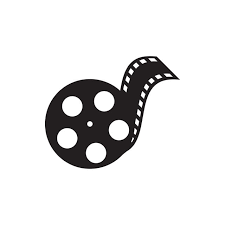

### BUSINESS PROBLEM
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## OBJECTIVE
Use exploratory data analysis and investigate the film industry data set  to gain in depth knowledge of what makes a studio successful and in turn utilize this analysis to create actionable recommendations for Microsoft new movie studio. 

import all the necessary libraries and import data frames 

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data set
movie_gross_df = pd.read_csv('bom.movie_gross.csv')

movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## DATA CLEANING 


This will involve dropping columns not required,deleting duplicate rows and filling Nan value spaces to make the data sets easier to work with.

Save the cleaned data set and Combine the two files into one dataset for analysis. 

In [4]:
#loading the first data set 
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
 
# check for duplicate rows 
duplicates = movie_gross_df.duplicated()

#print the number of duplicated rows .sum()
print(duplicates.sum())

0


In [5]:
#delete duplicated rows
movie_gross_df = movie_gross_df.drop_duplicates()

movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
# Check for NaN values
movie_gross_df.isnull()


,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [7]:
# Replace all NaN values  with the mean of the column, converted to a scalar
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].iloc[0])
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].iloc[0])

movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,652000000,2018
3383,Edward II (2018 re-release),FM,4800.0,652000000,2018
3384,El Pacto,Sony,2500.0,652000000,2018
3385,The Swan,Synergetic,2400.0,652000000,2018


In [8]:
tmdb_df = pd.read_csv('tmdb.movies.csv')

# check for duplicate rows 
duplicates = tmdb_df.duplicated()

#print the number of duplicated rows .sum()
print(duplicates.sum())

0


In [9]:
#delete duplicated rows
tmdb_df = tmdb_df.drop_duplicates()

tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
# Check for NaN values
tmdb_df.isnull()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False


In [11]:
#drop the unecessary column 
keep_cols = ['genre_ids', 'original_language', 'original_language', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']
tmdb_df = tmdb_df.drop(set(tmdb_df.columns) - set(keep_cols), axis=1)

tmdb_df

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
tmdb_df.to_csv('tmdb_cleaned.csv', index=False)

In [13]:
movie_gross_df.to_csv('movie_gross_cleaned.csv', index=False)

In [14]:
movie_gross_df2 = pd.read_csv('movie_gross_cleaned.csv')

movie_gross_df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,652000000,2018
3383,Edward II (2018 re-release),FM,4800.0,652000000,2018
3384,El Pacto,Sony,2500.0,652000000,2018
3385,The Swan,Synergetic,2400.0,652000000,2018


In [15]:
movie_gross_df2.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [16]:
tmdb_df2 = pd.read_csv('tmdb_cleaned.csv')

tmdb_df2

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
movie_df = tmdb_df2.merge(movie_gross_df2, on='title')

movie_df

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,"[16, 10751, 12]",en,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,652000000,2018
2699,"[28, 12, 16]",en,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018
2700,[35],es,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,652000000,2018
2701,[18],hi,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,652000000,2018


In [18]:
movie_df.isnull().sum()
    

genre_ids            0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               1
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

In [19]:
movie_df.dropna()

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,"[16, 10751, 12]",en,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,652000000,2018
2699,"[28, 12, 16]",en,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018
2700,[35],es,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,652000000,2018
2701,[18],hi,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,652000000,2018


In [20]:
movie_df.to_csv('movie_df.csv', index=False)

In [21]:
movie_df = pd.read_csv('movie_df.csv')
movie_df.head()

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


looking to add a new column called total_gross to my data frame, to do that first start by checking the dtype of the columns to be used to create the new column.

In [22]:
# Check the data type of the `foreign_gross` column
print(movie_df['domestic_gross'].dtype)
print(movie_df['foreign_gross'].dtype)

float64
object


In [23]:
# Load the CSV file into a Pandas DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Remove all commas from the foreign_gross column as some entires have a comma in them 
movie_df['foreign_gross'] = movie_df['foreign_gross'].str.replace(',', '')

# Convert the foreign_gross column to a float
movie_df['foreign_gross'] = movie_df['foreign_gross'].astype('float')

# Add the foreign column to the domestic column to make a new column called total gross
movie_df['total_gross'] = movie_df['domestic_gross'] + movie_df['foreign_gross']

# Save the changes to the DataFrame
movie_df.to_csv('movie_df.csv', index=False)

# Read the CSV file back into a DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Get the total gross
total_gross = movie_df['total_gross']

# Print the total gross
print(total_gross)


0       4.949000e+08
1       6.239000e+08
2       8.283000e+08
3       1.067000e+09
4       5.431000e+08
            ...     
2698    6.520243e+08
2699    2.191000e+06
2700    6.548000e+08
2701    6.520759e+08
2702    6.521810e+08
Name: total_gross, Length: 2703, dtype: float64


In [24]:
movie_df.head()

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,total_gross
0,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010,4.949000e+08
1,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010,6.239000e+08
2,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010,8.283000e+08
3,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010,1.067000e+09
4,"[16, 10751, 35]",en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010,5.431000e+08


## ANALYSIS
 with movie_df = pd.read_csv('movie_df.csv')these are the questions i seek to answer with the help of visualization graphs guided by https://pandas.pydata.org/docs/user_guide/visualization.html , https://regenerativetoday.com/a-complete-cheat-sheet-for-data-visualization-in-pandas/

### no.1. which movie studio has the highest amount of movie releases?

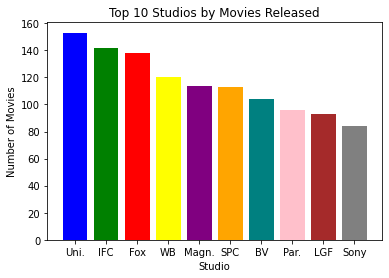

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into Pandas
movie_df = pd.read_csv('movie_df.csv')

# Group the DataFrame by studio and calculate the total number of movies released
studio_released = movie_df.groupby('studio')['genre_ids'].count()

# Sort the studio_released DataFrame by number of movies released in descending order
studio_released = studio_released.sort_values(ascending=False)

# Get the top 10 studios
top_10_studios = studio_released.index[:10]

# Create a list of colors for the bars
colors = ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'teal', 'pink', 'brown', 'gray']

# Create a bar chart of the top 10 studio released
plt.bar(top_10_studios, studio_released[top_10_studios].values, color=colors)

# Set the axis labels
plt.xlabel('Studio')
plt.ylabel('Number of Movies')

# Set the title of the graph
plt.title('Top 10 Studios by Movies Released')

# Save the plot
plt.savefig('Top 10 studios by Movies released.png')

# Show the graph
plt.show()


In [26]:
import pandas as pd

# Load the CSV file into Pandas
movie_df = pd.read_csv('movie_df.csv')

# Group the DataFrame by studio and calculate the total gross for each studio
studio_gross = movie_df.groupby('studio')['total_gross'].sum()

# Sort the studio_gross DataFrame by total gross in descending order
studio_gross = studio_gross.sort_values(ascending=False)

# Print out the top 10 highest grossing studios
print("The top 10 highest grossing studios are:")
for i in range(10):
    print(f"{i+1}. {studio_gross.index[i]} - ${studio_gross.iloc[i]}")


The top 10 highest grossing studios are:
1. IFC - $59703841997.0
2. BV - $50330700131.7
3. Magn. - $47851160099.0
4. SPC - $43116236398.0
5. Fox - $34055166596.0
6. Uni. - $31026080191.4
7. WB - $29518576999.0
8. Par. - $22549479696.0
9. A24 - $22239113600.0
10. Sony - $21462905497.0


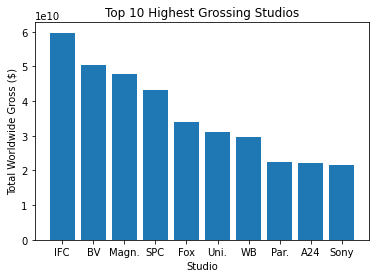

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into Pandas
movie_df = pd.read_csv('movie_df.csv')

# Group the DataFrame by studio and calculate the total gross for each studio
studio_gross = movie_df.groupby('studio')['total_gross'].sum()

# Sort the studio_gross DataFrame by total gross in descending order
studio_gross = studio_gross.sort_values(ascending=False)

# Get the top 10 highest grossing studios
top_10_studios = studio_gross.index[:10]

# Create a bar graph of the top 10 highest grossing studios
plt.bar(top_10_studios, studio_gross[top_10_studios])

# Set the axis labels
plt.xlabel('Studio')
plt.ylabel('Total Worldwide Gross ($)')

# Set the title of the graph
plt.title('Top 10 Highest Grossing Studios')

#save plot
plt.savefig('Top 10 Highest Grossing Studios')

# Show the graph
plt.show()


This bar graph shows that uni. which is Universal studios has released the most amount of films,this gives them more opprtunities to earn revenue from sales.However,it his of importance to note that  having the most amount of movie releases does not guarantee that a studio will be a top earner. Overall, the data suggests that the film industry is a very competitive business, but that there are opportunities for new studios to succeed by focusing on creating films in the most popular genres and by keeping their budgets under control.e other factors that play .refer to https://en.wikipedia.org/wiki/Major_film_studios for the full list of abbreveated studio names.

### NO.2. Which genre has the most produced  movies?

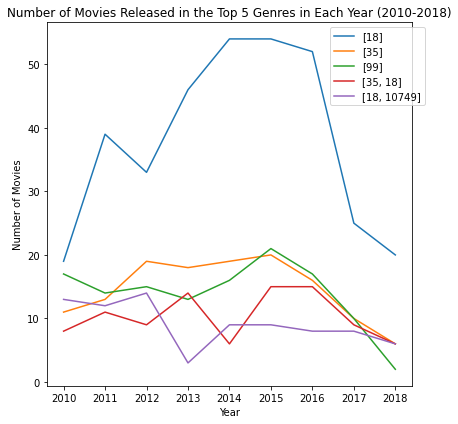

In [28]:
# Load the movie_df DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Filter the movie_df DataFrame to include only movies released between 2010 and 2018
filtered_movie_df = movie_df[movie_df['release_date'].between('2010-01-01', '2018-12-31')]

# Get the top 5 most popular genres
top_5_genres = filtered_movie_df['genre_ids'].value_counts().head(5).index.tolist()

# Create a dictionary to store the number of movies released in the top 5 genres in each year
genre_year_movie_counts = {}
for year in range(2010, 2019):
    for genre in top_5_genres:
        genre_year_movie_counts[(genre, year)] = filtered_movie_df[(filtered_movie_df['release_date'] >= f'{year}-01-01') & (filtered_movie_df['release_date'] <= f'{year}-12-31')]['genre_ids'].value_counts().get(genre, 0)

# Create a line graph of the number of movies released in the top 5 genres in each year
plt.figure(figsize=(6, 6))
for genre in top_5_genres:
    years = [year for year in range(2010, 2019)]
    movie_counts = [genre_year_movie_counts[(genre, year)] for year in range(2010, 2019)]
    plt.plot(years, movie_counts, label=genre)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released in the Top 5 Genres in Each Year (2010-2018)')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.xticks(range(2010, 2019))
plt.tight_layout()
#save the graph 
plt.savefig('Number of Movies Released in the Top 5 Genres in Each Year (2010-2018).png')
plt.show()


The above line Graph show the most popular genre with the higheset no of movies released by studio companys is [18 Drama], this is because can be funny, sad, or thought-provoking, but they always resonate with audiences on a deep level making them relatable and captivating for audiences. In addition to the above reasons, dramas are also popular because they offer a variety of subgenres to choose from. There are dramas about crime, medicine, law, politics, and more. This means that there is something for every one.refer to https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee for the list of genre ids.

### No.3. How has the popularity of the different genres changed over time?

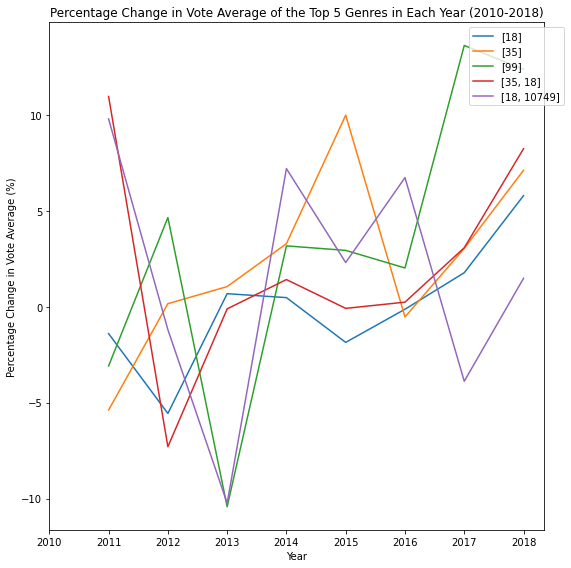

In [29]:
# Load the movie_df DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Filter the movie_df DataFrame to include only movies released between 2010 and 2018
filtered_movie_df = movie_df[movie_df['release_date'].between('2010-01-01', '2018-12-31')]

# Get the top 5 most popular genres
top_5_genres = filtered_movie_df['genre_ids'].value_counts().head(5).index.tolist()

# Calculate the percentage change in vote average for each genre in each year
genre_year_vote_average_percent_change = {}
for genre in top_5_genres:
    for year in range(2010, 2019):
        previous_year_vote_average = filtered_movie_df[(filtered_movie_df['genre_ids'] == genre) & (filtered_movie_df['release_date'] < f'{year}-01-01')]['vote_average'].mean()
        current_year_vote_average = filtered_movie_df[(filtered_movie_df['genre_ids'] == genre) & (filtered_movie_df['release_date'] >= f'{year}-01-01') & (filtered_movie_df['release_date'] <= f'{year}-12-31')]['vote_average'].mean()
        genre_year_vote_average_percent_change[(genre, year)] = (current_year_vote_average - previous_year_vote_average) / previous_year_vote_average * 100

# Create a line graph of the percentage change in vote average for each genre in each year
plt.figure(figsize=(8, 8))
for genre in top_5_genres:
    years = [year for year in range(2010, 2019)]
    vote_average_percent_change = [genre_year_vote_average_percent_change[(genre, year)] for year in range(2010, 2019)]
    plt.plot(years, vote_average_percent_change, label=genre)
plt.xlabel('Year')
plt.ylabel('Percentage Change in Vote Average (%)')
plt.title('Percentage Change in Vote Average of the Top 5 Genres in Each Year (2010-2018)')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.xticks(range(2010, 2019))
plt.tight_layout()
#save the graph
plt.savefig('Percentage Change in Vote Average of the Top 5 Genres in Each Year (2010-2018).png')
plt.show()


The above line Graph show that despite genre [18] being the most released genre movie as previously shown.there has been an increase in popularity in  genre[99] which is Documentary genre.There a number of factors that have contributed to its steep rise in popularity.One factor is the rise of streaming platforms such as Netflix.Another  factor is  the increasing interest in real-life stories and documentaries provide a way for people to learn about real-life stories in a way that is both informative and entertaining.
refer to https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee for the list of genre ids.

### No.4.What is the best time of the year to release a movie?

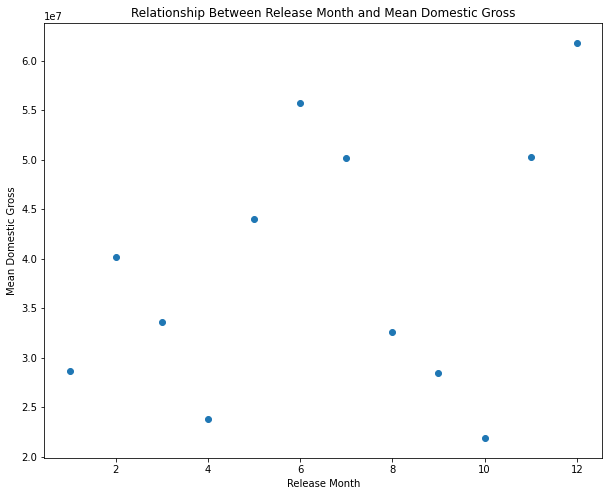

In [30]:
# Load the CSV file into a Pandas DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Convert the release_date column to a datetime type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Extract the month from the release_date column
release_month = movie_df['release_date'].dt.month

# Calculate the mean domestic gross for each month
mean_domestic_gross_by_month = movie_df.groupby(release_month)['domestic_gross'].mean()

# Sort the mean domestic gross by month
mean_domestic_gross_by_month = mean_domestic_gross_by_month.sort_index()

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(mean_domestic_gross_by_month.index, mean_domestic_gross_by_month.values)
plt.xlabel('Release Month')
plt.ylabel('Mean Domestic Gross')
plt.title('Relationship Between Release Month and Mean Domestic Gross')
# Save the plot to a file
plt.savefig('release_month_to_demestic_gross.png')
plt.show()


The scatter plot demonstrates that films that are released in December had the highest average gross as this is the ideal time to capitalize on the holiday season  and maximize box office earnings.we can also observe that the summer month of july is the  second highest earner this is because it is when most schools are on break giving peolpe more time to go for a movie  . 

### No.5. Which original language movie does best in the foreign market?

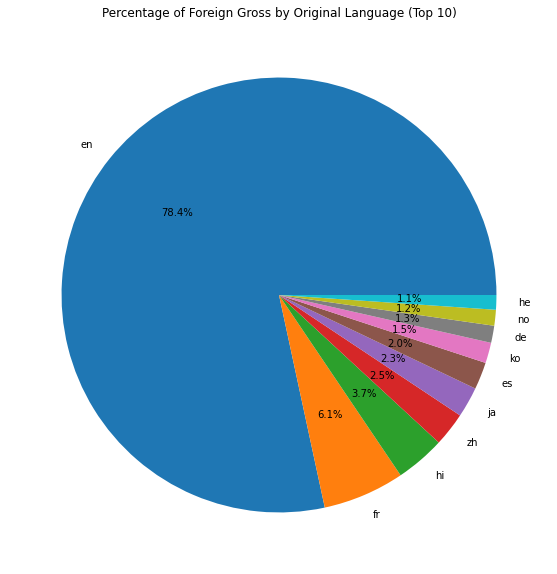

In [31]:
# Load the CSV file into a Pandas DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Calculate the total foreign gross for each original language
language_total_foreign_gross = movie_df.groupby('original_language')['foreign_gross'].sum()

# Sort the DataFrame by the total foreign gross
language_total_foreign_gross = language_total_foreign_gross.sort_values(ascending=False)

# Select the top 10 languages
top_10_languages = language_total_foreign_gross.index[:10]

# Create a pie chart of the total foreign gross for the top 10 languages
plt.figure(figsize=(14, 10))
plt.pie(language_total_foreign_gross[top_10_languages], labels=top_10_languages, autopct="%1.1f%%")

# Set the title of the plot
plt.title('Percentage of Foreign Gross by Original Language (Top 10)')

plt.savefig('percentage_foreign_gross.png')
# Show the plot
plt.show()


The above pie chart shows that English(en)-language films account for a large percentage of revenue for studios in the foreign market.English is a widely spoken language internationally.

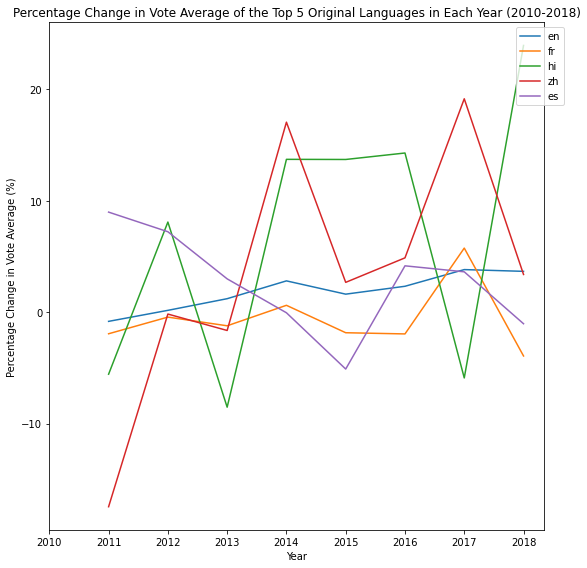

In [32]:
# Get the top 5 original languages
top_5_original_languages = filtered_movie_df['original_language'].value_counts().head(5).index.tolist()

# Filter the filtered_movie_df DataFrame to include only movies in the top 5 original languages
filtered_movie_df_top_5_original_languages = filtered_movie_df[filtered_movie_df['original_language'].isin(top_5_original_languages)]

# Calculate the percentage change in vote average for each original language in each year
original_language_year_vote_average_percent_change_top_5 = {}
for original_language in top_5_original_languages:
    for year in range(2010, 2019):
        previous_year_vote_average = filtered_movie_df_top_5_original_languages[(filtered_movie_df_top_5_original_languages['original_language'] == original_language) & (filtered_movie_df_top_5_original_languages['release_date'] < f'{year}-01-01')]['vote_average'].mean()
        current_year_vote_average = filtered_movie_df_top_5_original_languages[(filtered_movie_df_top_5_original_languages['original_language'] == original_language) & (filtered_movie_df_top_5_original_languages['release_date'] >= f'{year}-01-01') & (filtered_movie_df_top_5_original_languages['release_date'] <= f'{year}-12-31')]['vote_average'].mean()
        original_language_year_vote_average_percent_change_top_5[(original_language, year)] = (current_year_vote_average - previous_year_vote_average) / previous_year_vote_average * 100

# Create a line graph of the percentage change in vote average for each original language in each year
plt.figure(figsize=(8, 8))
for original_language in top_5_original_languages:
    years = [year for year in range(2010, 2019)]
    vote_average_percent_change = [original_language_year_vote_average_percent_change_top_5[(original_language, year)] for year in range(2010, 2019)]
    plt.plot(years, vote_average_percent_change, label=original_language)
plt.xlabel('Year')
plt.ylabel('Percentage Change in Vote Average (%)')
plt.title('Percentage Change in Vote Average of the Top 5 Original Languages in Each Year (2010-2018)')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.xticks(range(2010, 2019))
plt.tight_layout()
#save the graph
plt.savefig('Percentage Change in Vote Average of the Top 5 Original Languages in Each Year (2010-2018).png')
plt.show()


This suggests that English movies are continuing to become more popular with audiences over time.the steep rise and decline of the other languages suggest that there is potential for growth of movies in the other foreign language.

### No.6 does the popularity of a movie/genre diretly affect how much a movie studio makes ?

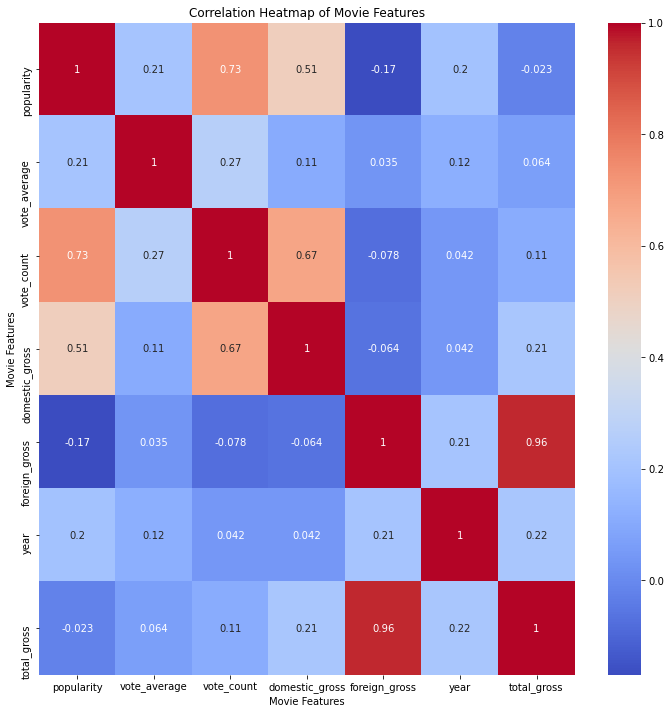

In [33]:
# Load the movie_df DataFrame
movie_df = pd.read_csv('movie_df.csv')

# Create a correlation matrix
corr_matrix = movie_df.corr()

# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add labels and title to the plot
ax.set_xlabel('Movie Features')
ax.set_ylabel('Movie Features')
plt.title('Correlation Heatmap of Movie Features')

# Save the graph
plt.savefig('Correlation_Heatmap_of_Movie_Features.png')
plt.show()


## CONCLUSION

This is just but a drop in the ocean of the many other possiblities that could arise from  analysis of widely available movies datasets.Below are the conclusions ariived at after analysis of movie_df.csv that will result in Microsft New Movie Studios' success.

1.This the most obvious insight fromt the dataset,but also very important. By foucusing on  creating multiple high_quality films in the most popular genre Microsft new movie studio will increase its chances of succes in the film indusrty.

2.Target specific audiences by focusing on creating sub genres of the highest grossing  genres.Microsoft can carryout futher analysis to identify which sub genres and audiences are not catered for.

3.Microsoft can increase their total gross by releasing films not just in the domestic market but worldwide as well this allows films to reach a much larger audience.

4.Refering to 'Percentage Change in Vote Average of the Top 5 Genres in Each Year (2010-2018).png')Invest in new and innovative storytelling techniques for the Comedy genre. The Comedy genre is still very popular, but it is also facing more competition from other genres. Microsoft new Studio could invest in new and innovative storytelling techniques to keep audiences engaged with Comedy movies.

5.'Percentage Change in Vote Average of the Top 5 Genres in Each Year (2010-2018)has aslo shown that there has been rise of interest in other genres due to avilability of streming platforms.Microsoft can take advantge of this opportunity and partner with a streaming platform to produce movies in genres such as documentaries.

6.We recommend that Microsoft also take into account the impact of vote average on gross income and focus their marketing efforts on increasing the vote average of their movies, which will in turn increase their gross income.

7.There is a reason as to why the top ten grossing movie studios are where the are.Microsoft should take opportunity to learn from the most successful studios in a number of ways,such as studying their business models to be able to develop their own business strategies that are tailored to their specific needs.

